In [81]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [125]:
def overall_summary(G):

    # PRINT NUMBER OF NODES
    print(f"Number of nodes (surfers): {len(G.nodes())}\n")

    # GET IN-DEGREE STATS
    print("IN-DEGREE SUMMARY:")
    node_in_degrees = dict(G.in_degree(weight="weight"))
    in_degree_list = list(node_in_degrees.values())
    surfer_list = list(node_in_degrees.keys())

    # SHOW HISTOGRAM
    sns.histplot(in_degree_list, bins=20, color="darkblue")
    plt.title("Distribution of In-degree", fontsize=18)
    plt.xlabel("In-degree", fontsize=14)
    plt.ylabel("Surfer count", fontsize=14)
    plt.show(); plt.clf()

    # MAKE DATAFRAME
    df = pd.DataFrame({"surfer": surfer_list, "in-degree": in_degree_list})
    
    # PLOT IN-DEGREE VS NUMBER OF EVENTS
    events_col = []
    for name in df["surfer"]:
        events_col.append(G.nodes[name]["events"])
    df["events"] = events_col
    sns.scatterplot(x="events", y="in-degree", data=df, color="darkblue")
    plt.title("In-degree vs Number of Events ", fontsize=18)
    plt.xlabel("Number of events", fontsize=14)
    plt.ylabel("In-degree", fontsize=14)
    plt.show(); plt.clf()

    # ISOLATE TOP SURFERS BY IN-DEGREE
    df = df.sort_values(by="in-degree", ascending=False)
    df.reset_index(inplace=True, drop=True)
    print(df.head(20))
    print("\n")
    nodes_over = df[df["in-degree"] > 400]
    perc_over = len(nodes_over) / len(df)
    print(f"Number of surfers with in-degree > 400: {len(nodes_over)}")
    print(f"Surfers with in-degree >400: {round(perc_over, 4)*100}%")



## Analysis of in-degree

Number of nodes (surfers): 131

IN-DEGREE SUMMARY:


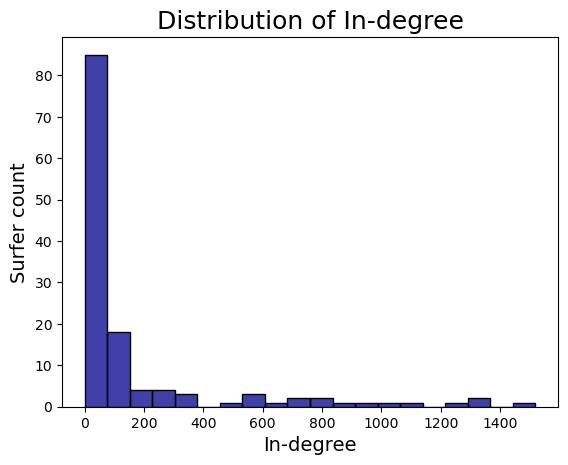

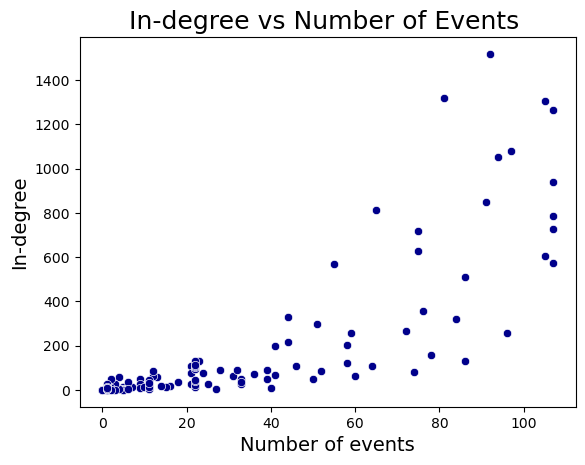

                surfer  in-degree  events
0       Gabriel Medina       1519      92
1         Mick Fanning       1319      81
2         Kelly Slater       1306     105
3          Jordy Smith       1267     107
4        Julian Wilson       1080      97
5       Joel Parkinson       1053      94
6     Adriano de Souza        941     107
7   John John Florence        851      91
8           Taj Burrow        815      65
9        Michel Bourez        788     107
10         Owen Wright        726     107
11       Filipe Toledo        718      75
12           Josh Kerr        629      75
13       Jeremy Flores        605     105
14       Adrian Buchan        575     107
15      Italo Ferreira        570      55
16       Kolohe Andino        512      86
17     Sebastian Zietz        359      76
18      Kanoa Igarashi        329      44
19       Bede Durbidge        321      84


Number of surfers with in-degree > 400: 17
Surfers with in-degree >400: 12.98%


<Figure size 640x480 with 0 Axes>

In [126]:
net = nx.read_gml(f"../data/networks/overall_results_network.gml")
overall_summary(net)


## Analyze overall network of top surfers by in-degree

Number of nodes (surfers): 17

IN-DEGREE SUMMARY:


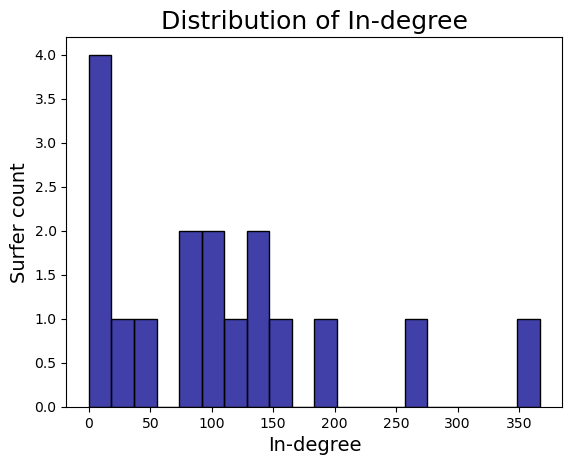

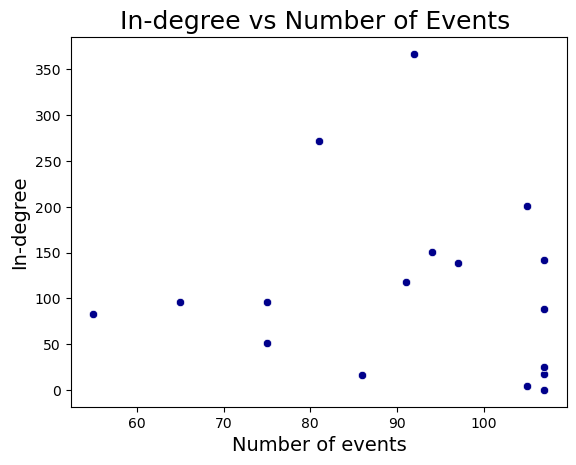

                surfer  in-degree  events
0       Gabriel Medina        367      92
1         Mick Fanning        272      81
2         Kelly Slater        201     105
3       Joel Parkinson        151      94
4          Jordy Smith        142     107
5        Julian Wilson        139      97
6   John John Florence        118      91
7        Filipe Toledo         96      75
8           Taj Burrow         96      65
9     Adriano de Souza         88     107
10      Italo Ferreira         83      55
11           Josh Kerr         51      75
12         Owen Wright         25     107
13       Michel Bourez         17     107
14       Kolohe Andino         16      86
15       Jeremy Flores          4     105
16       Adrian Buchan          0     107


Number of surfers with in-degree > 400: 0
Surfers with in-degree >400: 0.0%


<Figure size 640x480 with 0 Axes>

In [127]:
node_degrees = dict(net.in_degree(weight="weight"))
filtered_nodes = [node for node, in_degree in node_degrees.items() if in_degree > 400]
filtered_net = net.subgraph(filtered_nodes)

overall_summary(filtered_net)

nx.write_gml(filtered_net, "../filtered_networks/top_surfer_network.gml")